# TP noté -- Statistical models for decision making - partie 2

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E2_Efficiency_Obs.csv*. Plus spécifiquement, nous nous demandons :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

### Question 1.1 

Ouvrez et observez les données. A leur vue, quelle vous semble être la réponse aux trois questions posées plus haut ?

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


dataframe=pandas.read_csv("./E1_Efficiency_Obs.csv",sep=',')

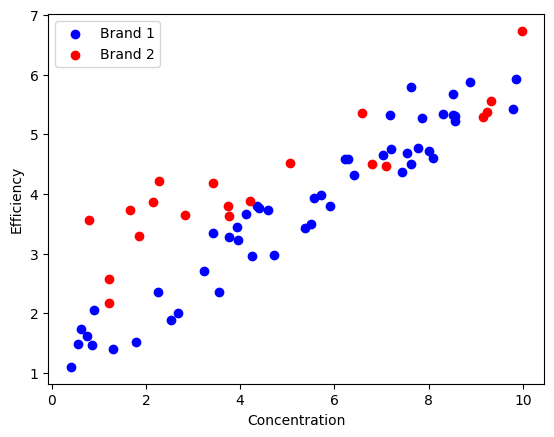

In [3]:
dt1 = dataframe[dataframe.Brand == "Brand_1"]
dt2 = dataframe[dataframe.Brand == "Brand_2"]
plt.scatter(dt1.Concentration,dt1.Efficiency, color = 'blue', label = 'Brand 1')
plt.scatter(dt2.Concentration,dt2.Efficiency, color = 'red', label = 'Brand 2')
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.legend()


- Le produit semble-t-il avoir un effet ?

    Oui, un moteur avec un produit plus concentré semble avoir une meilleure efficacité
- Cet effet est-il différent en fonction de la marque du moteur ?

    Oui l'effet est différent. A faible concentration, le moteur 2 est plus efficace, tandis qu'à haute concentration les deux moteurs ont une efficacité similaire. On peut en déduire que le produit est plus efficace pour le moteur 1 
- Cet effet dépend-il de la concentration du produit ?

    Il semblerait qu'un produit plus concentré induit une meilleure efficacité

### Question 1.2 

Afin de répondre aux questions, deux hypothèses sont formulées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution du bruit des observations est supposé suivre une loi Normale centrée.

Quelle démarche de modélisation statistique allez-vous utiliser pour répondre aux trois questions posées en introduction ? Une fois la démarche bien expliquée, testez la sur les données observées afin de conclure sur l'efficacité du produit.

$\rightarrow$ On va quantifier le lien entre l'efficacité E et la concentration C, en supposant qu'une relation linéaire existe, le bruit affectant les observations de E.
On va appliquer un modèle de régression linéaire en optimisant les paramètres grâce au modèle des moindres carrés où l'erreur e suit une loi normale centrée.

b1 = 1.1514211119371502 et a1 = 0.4914818032677403
b2 = 2.789553606142352 et a2 = 0.3090175959782139


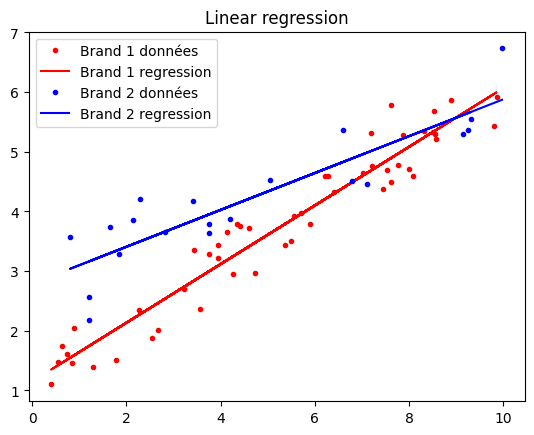

In [8]:
# Régression linéaire pour chaque marque

C1 = dt1.Concentration.to_numpy()[:, np.newaxis]  # <-- convertir en array
E1 = dt1.Efficiency.to_numpy()
lr1 = LinearRegression()
lr1.fit(C1,E1)

C2 = dt2.Concentration.to_numpy()[:, np.newaxis]  # <-- convertir en array
E2 = dt2.Efficiency.to_numpy()
lr2 = LinearRegression()
lr2.fit(C2,E2)

# Afficher des coefficients E = a*C + b
print('b1 = '+str(lr1.intercept_)+' et a1 = '+str(lr1.coef_[0]))
print('b2 = '+str(lr2.intercept_)+' et a2 = '+str(lr2.coef_[0]))


# Affichage des 2 regressions lineaires 
fig = plt.figure()
plt.plot(C1,E1, 'r.')
plt.plot(C1, lr1.predict(C1), 'r-')
plt.plot(C2,E2, 'b.')
plt.plot(C2, lr2.predict(C2), 'b-')
plt.legend(['Brand 1 données','Brand 1 regression','Brand 2 données','Brand 2 regression'])
plt.title('Linear regression')
plt.show()

- Le produit semble-t-il avoir un effet ?

    Les pentes a1 et a2 étant positives non nulles, on peut en conclure que le produit a un effet
    
- Cet effet est-il différent en fonction de la marque du moteur ?

    Oui, et pour compléter la réponse 1.1, la pente du moteur 1 étant supérieure à celle du moteur 2 (a1 = 0.49 et a2 = 0.31), on peut conclure que l'effet est plus important sur le moteur que sur le moteur 2.

- Cet effet dépend-il de la concentration du produit ?

    Oui on peut confirmer nos suppositions, un produit plus concentré induit bien une meilleure efficacité

## Exercice 2


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 


### QUESTION 2.1

Les données d'apprentissage sont dans les fichiers *E2_sensor_vals.csv* et *E2_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.
 

sensor_01    0.221019
sensor_02    0.007972
sensor_03    0.005075
sensor_04    0.000776
sensor_05    0.024634
sensor_06    0.031648
sensor_07    0.003124
sensor_08    0.026392
sensor_09    0.001534
sensor_10    0.002134
sensor_11    0.017461
sensor_12    0.165931
sensor_13    0.000305
sensor_14    0.012325
sensor_15    0.714995
sensor_16    0.046081
sensor_17    0.000071
dtype: float64

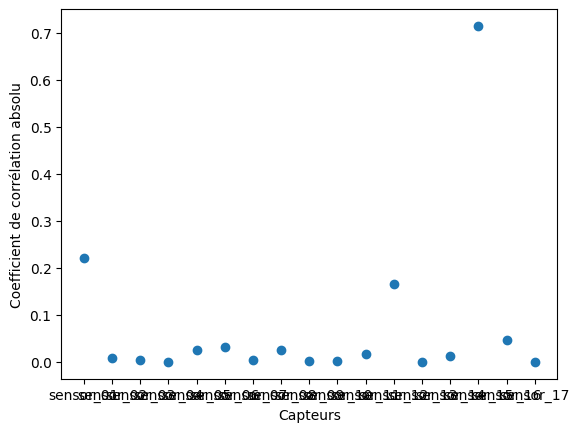

In [9]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


X=pandas.read_csv("./E2_sensor_vals.csv", sep=';')
X.head()
Y=pandas.read_csv("./E2_stress_vals.csv")


#plt.plot(X.values[:,],Y.values,'.', alpha=0.3)
#plt.xlabel('Sensor values')
#plt.ylabel('Stress values')

# Puisque les graphes se superposent, il est difficile de voir une tendance. On passe alors par la comparaison des coefficients de corrélation.

cor2 = X.corrwith(Y.squeeze())**2

# En affichant les coefficients de corrélation en valeur absolue, on peut voir que certains capteurs sont plus corrélés que d'autres avec le stress.
plt.plot(cor2, 'o')
plt.xlabel('Capteurs')
plt.ylabel('Coefficient de corrélation absolu')
cor2

En général, les capteurs et le niveau de stress ne sont pas corrélés.
Seuls 3 capteurs semblent pertinents : 
- capteur 1 : R² = 0.221019
- capteur 12 : R² = 0.165931
- capteur 15 : R² = 0.714995
 


### QUESTION 2.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.


#### QUESTION 2.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée sur ce jeu de données ?


#### QUESTION 2.2.2

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.


In [10]:
"""
for sensor in ["sensor_01","sensor_12","sensor_15"] : 
    X_sensor = X[[sensor]]
    lr = LinearRegression()
    lr.fit(X_sensor, Y)

    Y_pred = lr.predict(X_sensor)
    s2 = np.sum((Y-Y_pred)**2)
    print("Pour " + str(sensor) +
          ", b0 = " + str(lr.intercept_[0]) +
          " et b1 = " + str(lr.coef_[0][0]) + 
          ", s2 = " + str(s2.Stress)) 
"""

from sklearn.metrics import mean_squared_error


X_sensor = X[["sensor_01","sensor_12", "sensor_15"]]

lr = LinearRegression()
lr.fit(X_sensor, Y)
Y_pred = lr.predict(X_sensor)
s2 = np.sum((Y-Y_pred)**2, axis = 0)

print("Les betas sont " + str(lr.coef_[0]) + "\nL'erreur quadratique moyenne est de MSE = " + str(mean_squared_error(Y,Y_pred)))

print("Il est possible de faire 3 types de stratégies de validation croisée : une subdivision en 2 groupes, un K-folds ou un Leave-One-Out.\n"
        "Cependant, vu que chaque sensor contient n = 64 observations, faire un LOO est très couteux et aura une forte variance en sortie.\n" \
        "Il semble donc judicieux de faire un K-folds qui évaluera la performance de manière optimale.\n" \
        "On peut déjà penser à découper l'espace en K = 8 morceaux.")

Les betas sont [ 0.11621802 -0.28864242  0.06168719]
L'erreur quadratique moyenne est de MSE = 3.3780904734434127
Il est possible de faire 3 types de stratégies de validation croisée : une subdivision en 2 groupes, un K-folds ou un Leave-One-Out.
Cependant, vu que chaque sensor contient n = 64 observations, faire un LOO est très couteux et aura une forte variance en sortie.
Il semble donc judicieux de faire un K-folds qui évaluera la performance de manière optimale.
On peut déjà penser à découper l'espace en K = 8 morceaux.



### QUESTION 2.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

**Stratégie 1** : Quelle stratégie utiliseriez vous pour détecter automatiquement des données aberrantes dans un jeu de données ?

#### QUESTION 2.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.


Stratégie 1 :
On peut détecter des outliers via la méthode de l'effet levier et en comparant les distances de Cook.

Stratégie 2 :On prend en compte l'ensemble des observations sensor_12 pour l'apprentissage du modèle linéaire.
On considère également que les erreurs suivent une loi normale centrée.
On peut alors définir un intervalle de confiance dans lequel doit se trouver les observations
Si elle ne se trouve pas dans cet intervalle, c'est un outliner
Notre test d'hypothèse est le suivant pour chaque i dans [1,n]: 
   H0 : |yi| < intervalle de confiance
   H1 : |yi| > intervalle de confiance

La 2ème observation où y_2 = [6] est un outliner.
La 62ème observation où y_62 = [4] est un outliner.

L'ensemble des outliners est donc : [2, 62]



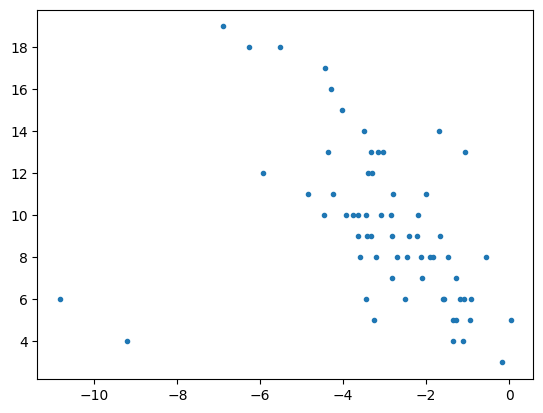

In [22]:
print("Stratégie 1 :\n" \
"On peut détecter des outliers via la méthode de l'effet levier et en comparant les distances de Cook.")

print("\nStratégie 2 :" \
"On prend en compte l'ensemble des observations sensor_12 pour l'apprentissage du modèle linéaire.\n" \
"On considère également que les erreurs suivent une loi normale centrée.\n" \
"On peut alors définir un intervalle de confiance dans lequel doit se trouver les observations\n" \
"Si elle ne se trouve pas dans cet intervalle, c'est un outliner\n" \
"Notre test d'hypothèse est le suivant pour chaque i dans [1,n]: \n" \
"   H0 : |yi| < intervalle de confiance\n" \
"   H1 : |yi| > intervalle de confiance\n")

from scipy.stats import t

# reshape des observations de sensor_12 et Y en numpy
X12 = X['sensor_12'].to_numpy().reshape(-1,1)
Y12 = Y.to_numpy() 

# Calcul des éléments de l'estimation 
n = np.size(X12)
moy_x = np.mean(X12)
s2_x = np.var(X12)

# Prédiction
lr = LinearRegression()
lr.fit(X12, Y)
Y_pred = lr.predict(X12)

# Calcul de la variance résiduelle
s = np.sqrt(1/(n-1)*np.sum((Y12-Y_pred)**2))

# Initialisation des données pour la loi de Student pour alpha = 0.05
alpha = 0.05
df = n-2

# Initialisation de l'intervalle de confiance et des outliners
intervalle = np.zeros([n,2])
outliner = list()

for i in range(n) : # Construction des intervalles de confiance autour de chaque Y_pred
    xi = X12[i] 
    différence = s * t.ppf(alpha/2, df) * (1 + 1/n + (xi-moy_x)**2/((n-1)*s2_x))**0.5 
    intervalle[i,0] = Y_pred[i,0] + différence[0]
    intervalle[i,1] = Y_pred[i,0] - différence[0]


for i in range(n) : # Print des observations en dehors de l'intervalle de confiance, donc étant un outliner

    if Y12[i] > intervalle[i,1] or Y12[i] < intervalle[i,0] :
        outliner.append(i)        
        print("La " + str(i) + "ème observation où y_" + str(i) + " = " + str(Y12[i]) + " est un outliner." )

    else :
        continue

print("\nL'ensemble des outliners est donc : " + str(outliner) + "\n")

plt.plot(X12, Y12, '.') # --> On dénote 2 outliners dans les observations



### QUESTION 2.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 2.4.1

Avant d'effectuer une régression linéaire régularisée, il est vivement conseillé d'effectuer une étape de centrage réduction des données. Pourquoi ?

#### Réponse : 
    Il est nécessaire d'uniformiser les données car les capteurs peuvent avoir des unités et amplitudes différentes. Un jeu de données avec une plus grande variance sera analysé différement qu'un autre jeu. 

#### QUESTION 2.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 2.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?

